In [27]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
t.test(1:10, 1:10, var.equal = T) 


	Two Sample t-test

data:  1:10 and 1:10
t = 0, df = 18, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.844662  2.844662
sample estimates:
mean of x mean of y 
      5.5       5.5 


In [4]:
t.test(1:10, y = c(7:20)) 


	Welch Two Sample t-test

data:  1:10 and c(7:20)
t = -5.4349, df = 21.982, p-value = 1.855e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.052802  -4.947198
sample estimates:
mean of x mean of y 
      5.5      13.5 


In [8]:
t.test(1:10, y = c(7:20), var.equal = T)      # P = .00001855
t.test(1:10, y = c(7:20, 200)) # P = .1245    -- NOT significant anymore


	Two Sample t-test

data:  1:10 and c(7:20)
t = -5.1473, df = 22, p-value = 3.691e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.223245  -4.776755
sample estimates:
mean of x mean of y 
      5.5      13.5 



	Welch Two Sample t-test

data:  1:10 and c(7:20, 200)
t = -1.6329, df = 14.165, p-value = 0.1245
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -47.242900   6.376233
sample estimates:
mean of x mean of y 
  5.50000  25.93333 


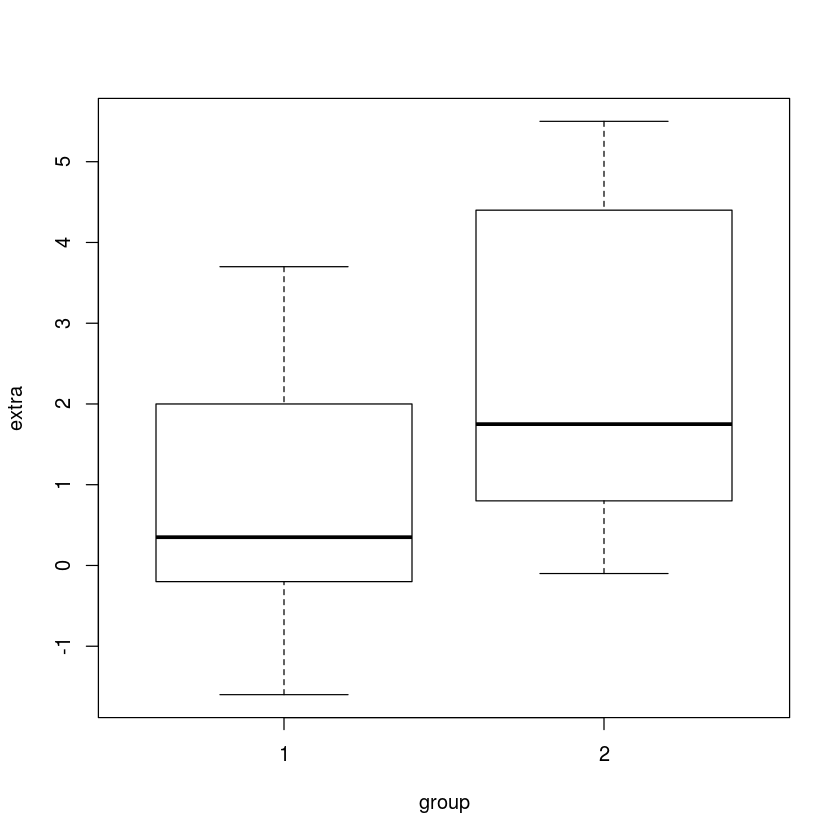

In [12]:
## Classical example: Student's sleep data
plot(extra ~ group, data = sleep)

In [14]:
## Traditional interface
with(sleep, t.test(extra[group == 1], extra[group == 2]))


	Welch Two Sample t-test

data:  extra[group == 1] and extra[group == 2]
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean of x mean of y 
     0.75      2.33 


In [16]:
## Formula interface
t.test(extra ~ group, data = sleep, var.equal = T)


	Two Sample t-test

data:  extra by group
t = -1.8608, df = 18, p-value = 0.07919
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.363874  0.203874
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


### Example of t-test

In [19]:
MyFirstData <- read.csv('../Data/MyFirstData.csv', header = TRUE)
str(MyFirstData)

'data.frame':	1200 obs. of  8 variables:
 $ villid   : int  1001106 1001106 1001106 1001106 1001106 1001106 1001106 1001106 1001106 1001106 ...
 $ hogid    : Factor w/ 1200 levels "0101103002.0639",..: 10 11 12 13 14 15 16 17 18 19 ...
 $ D_HH     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ IncomeLab: int  NA NA NA 3200 NA 4320 4800 NA NA 3200 ...
 $ famsize  : int  6 6 6 5 5 5 5 6 6 3 ...
 $ agehead  : int  29 43 43 25 40 40 39 45 42 22 ...
 $ sexhead  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 2 1 2 2 ...
 $ pov_HH   : Factor w/ 2 levels "no pobre","pobre": 2 1 1 2 1 1 1 2 1 2 ...


In [58]:
?standard.error

In [46]:
t_values <- t.test(IncomeLab ~ D_HH, data = MyFirstData, var.equal = T)
t_values
str(t_values)


	Two Sample t-test

data:  IncomeLab by D_HH
t = 2.7327, df = 172, p-value = 0.006938
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  305.1836 1892.7926
sample estimates:
mean in group 0 mean in group 1 
       3044.894        1945.906 


List of 9
 $ statistic  : Named num 2.73
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 172
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.00694
 $ conf.int   : atomic [1:2] 305 1893
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 3045 1946
  ..- attr(*, "names")= chr [1:2] "mean in group 0" "mean in group 1"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ alternative: chr "two.sided"
 $ method     : chr " Two Sample t-test"
 $ data.name  : chr "IncomeLab by D_HH"
 - attr(*, "class")= chr "htest"


In [37]:
# Or Calculate df manually
# degress of freedom = number of valid values (excluding NA) - 2
df <- MyFirstData %>% filter(!is.na(IncomeLab), !is.na(D_HH)) %>% nrow
df <- df - 2
df

[1] 172

In [1]:
# critical t-value for a distribution with degrees of freedom of (174-2=172)
# for a two-sided test at significance level of 5%
qt(0.975, 172)

[1] 1.973852

Since the t-statistic (2.7327) is larger than the critical t-value (-1.974), we reject the null hypothesis with 95% confidence, say that there is difference between the two groups.

In [56]:
# Automate the interpretation
# Reject H0 = (The difference is) statistically significant
if(t_values$statistic > qt(0.025, t_values$parameter))
   print("Reject H0 at 95% confidence level, the two groups are different") else
   print("No difference")

[1] "Reject H0 at 95% confidence level, the two groups are different"
